In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
#import seaborn as sns
#import csv
#from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', None)

## Download data from https://www.kaggle.com/c/avazu-ctr-prediction

In [2]:
data_frame = pd.read_csv('ad_data/train.csv', nrows=2000)

In [3]:
data_frame.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ddd2926e,44956a24,1,2,15706,320,50,1722,0,35,-1,79
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,96809ac8,711ee120,1,0,15704,320,50,1722,0,35,100084,79
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b3cf8def,8a4875bd,1,0,15704,320,50,1722,0,35,100084,79
3,10000640724480838376,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,e8275b8f,6332421a,1,0,15706,320,50,1722,0,35,100084,79
4,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,9644d0bf,779d90c2,1,0,18993,320,50,2161,0,35,-1,157


In [4]:
data_frame.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,2.000000e+03,2000.000000,2000.0,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,9.411442e+18,0.164500,14102100.0,1005.027500,0.187000,1.052000,0.200500,17728.917500,318.412000,57.517000,1968.592000,0.813000,125.271000,39788.956500,87.492500
std,2.496207e+18,0.370821,0.0,1.051806,0.390009,0.565204,0.643045,3109.411542,9.509757,38.962492,383.160429,1.242499,230.786351,48999.551862,45.171597
min,1.004777e+16,0.000000,14102100.0,1001.000000,0.000000,0.000000,0.000000,377.000000,216.000000,36.000000,112.000000,0.000000,35.000000,-1.000000,13.000000
25%,1.005475e+19,0.000000,14102100.0,1005.000000,0.000000,1.000000,0.000000,15705.000000,320.000000,50.000000,1722.000000,0.000000,35.000000,-1.000000,61.000000
50%,1.013005e+19,0.000000,14102100.0,1005.000000,0.000000,1.000000,0.000000,17653.000000,320.000000,50.000000,1973.500000,0.000000,35.000000,-1.000000,79.000000
75%,1.020999e+19,0.000000,14102100.0,1005.000000,0.000000,1.000000,0.000000,20362.000000,320.000000,50.000000,2307.000000,2.000000,39.000000,100084.000000,117.000000
max,1.028688e+19,1.000000,14102100.0,1010.000000,1.000000,5.000000,5.000000,21704.000000,320.000000,480.000000,2497.000000,3.000000,1835.000000,100248.000000,157.000000


In [5]:
# one hot encode the categorical variables
pd.get_dummies(data_frame['site_category'], prefix='site_category').head()

,site_category_0569f928,site_category_110ab22d,site_category_28905ebd,site_category_335d28a8,site_category_3e814130,site_category_50e219e0,site_category_72722551,site_category_75fa27f6,site_category_76b2941d,site_category_c0dd3be3,site_category_f028772b,site_category_f66779e6
0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# transform categorical data
# go through all categorical variables & convert them to one-hot encode except fe which are not needed
exclude_from_transformation = ['id', 'click', 'hour', 'device_ip', 'device_id']
headers = data_frame.columns.tolist()
for header in headers:
    if header in exclude_from_transformation:
        continue
    one_hot = pd.get_dummies(data_frame[header], prefix=header)
    data_frame = data_frame.drop(header, axis=1)
    data_frame = data_frame.join(one_hot)

In [7]:
data_frame.head()

,id,click,hour,device_id,device_ip,C1_1001,C1_1002,C1_1005,C1_1007,C1_1010,banner_pos_0,banner_pos_1,site_id_02d5151c,site_id_030440fe,site_id_04773863,site_id_06a0ac14,site_id_070ca277,site_id_09c3b4c1,site_id_0a742914,site_id_0aab7161,site_id_0c2fe9d6,site_id_0d0207b0,site_id_0eb72673,site_id_11944c42,site_id_12fb4121,site_id_13b31263,site_id_14c5faa4,site_id_178a7b89,site_id_17caea14,site_id_18859862,site_id_1a5c1d83,site_id_1aaa89da,site_id_1b171d6d,site_id_1bf0f8d0,site_id_1e25e084,site_id_1fbe01fe,site_id_222acd54,site_id_22d080df,site_id_2328ee8e,site_id_2398553f,site_id_26fa1946,site_id_29229f8e,site_id_29cfa778,site_id_2c4ed2f7,site_id_2d7bacb1,site_id_34040f5c,site_id_34d1d55f,site_id_37ecc00c,site_id_38217daf,site_id_383f4a51,site_id_395fa97c,site_id_39cffaa4,site_id_3a66a5a5,site_id_3c20a05a,site_id_3c5d765d,site_id_3d88bdd0,site_id_3dbbce24,site_id_3e183f99,site_id_43d6df75,site_id_44637516,site_id_44f60771,site_id_461f4ff6,site_id_47d1a0f2,site_id_4b0f0061,site_id_4bf5bbe2,site_id_4dd0a958,site_id_4fd4e711,site_id_5114c672,site_id_517b8671,site_id_518d6168,site_id_529a2583,site_id_52c67a67,site_id_543a539e,site_id_57fe1b20,site_id_5abb07e8,site_id_5b08c53b,site_id_5b4d2eda,site_id_5b787406,site_id_5ee41ff2,site_id_61742004,site_id_61a8c644,site_id_6256f5b4,site_id_6399eda6,site_id_6423a528,site_id_653f65e4,site_id_6b175d24,site_id_6c5b482c,site_id_6ec06dbd,site_id_6f1058d5,site_id_7294ea0f,site_id_72a56356,site_id_7549fe4f,site_id_75f43c5a,site_id_763a42b5,site_id_7697ed3e,site_id_77bfdd7b,site_id_790c9243,site_id_791b5571,site_id_7a34d501,site_id_7c6576be,site_id_7dd19f44,site_id_7f4b0183,site_id_7fa5a4d1,site_id_801dfefb,site_id_81bf62aa,site_id_83a0ad1a,site_id_84a56636,site_id_84c7ba46,site_id_856e6d3f,site_id_85f751fd,site_id_89a490f5,site_id_8cbacf0b,site_id_8d7e1373,site_id_8fda644b,site_id_92c7cbe7,site_id_930c2840,site_id_93377b07,site_id_93de26ae,site_id_93eaba74,site_id_94ff9aef,site_id_95be0243,site_id_97430aa8,site_id_97c9ac6a,site_id_9a28a858,site_id_9a977531,site_id_9b124c1e,site_id_9e8cf15d,site_id_9e8e8d09,site_id_9ee9dd00,site_id_9f737c63,site_id_9fe0fa9b,site_id_a1b948b8,site_id_a831e579,site_id_aad25774,site_id_b554a32a,site_id_b59f88e0,site_id_b64a28fc,site_id_b7e9786d,site_id_b87f11a1,site_id_b99a2c43,site_id_b9b31250,site_id_bb4524e7,site_id_bc3b3740,site_id_bfc04b95,site_id_c1fcc9a1,site_id_c63170c5,site_id_c74e86fb,site_id_cbb01868,site_id_cd58172f,site_id_cdd3448e,site_id_ceea3181,site_id_cffc1324,site_id_d38b2fb9,site_id_d6137915,site_id_d7714196,site_id_d7f3460b,site_id_d8bb8687,site_id_d9750ee7,site_id_da79c793,site_id_db45d754,site_id_e023ba3e,site_id_e030b8dc,site_id_e151e245,site_id_e3c09f3a,site_id_e4d8dd7b,site_id_e59ef3fc,site_id_e5c60a05,site_id_e7777bfa,site_id_e8f79e60,site_id_e9ca7d40,site_id_ec1aa5a1,site_id_ef5ed6b8,site_id_eff5abd6,site_id_f17ebd97,site_id_f1b5c97e,site_id_f282ab5a,site_id_f528e1e7,site_id_f5476ff8,site_id_f61eaaae,site_id_f727f4e0,site_id_f84e52b6,site_id_f9c69707,site_id_faf9c1c2,site_id_fd309fe8,site_id_fe8cc448,site_id_fec6e632,site_id_ff361da0,site_id_ff61c6a9,site_domain_00e1b9c0,site_domain_08ba7db9,site_domain_0a4015b2,site_domain_0b204815,site_domain_0d3cb7be,site_domain_0dde25ec,site_domain_0f095819,site_domain_10cfed0c,site_domain_132080af,site_domain_14878e20,site_domain_16a36ef3,site_domain_16ceac46,site_domain_172a0915,site_domain_17d996e6,site_domain_1a02dd86,site_domain_1b65d16a,site_domain_1e0acfb4,site_domain_1fa968fc,site_domain_25d4cfcd,site_domain_272c5d9d,site_domain_274ddcab,site_domain_27e3c518,site_domain_28b9656a,site_domain_28f93029,site_domain_295551a1,site_domain_2f1172f7,site_domain_30518255,site_domain_346a9e03,site_domain_38b1b595,site_domain_39b3d1ff,site_domain_3b953bf0,site_domain_3f2f3819,site_domain_3f797953,site_domain_422b8953,site_domain_42fb0c49,site_domain_449497bc,site_domain_44eebc70,site_domain_452bed30,site_domain_45368af7,site_domain_4c26e9ba,site_domain_510bd839,site_domain_5449fde7,site_domain_553231d0,site

In [8]:
X = data_frame.drop(['click', 'id', 'hour', 'device_ip', 'device_id'], axis=1)
Y = data_frame['click']
print(X.shape)

(2000, 1363)


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/4., random_state=0)

In [10]:
# Run standard Linear Regressions
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_train_pred = lm.predict(X_train)
Y_test_pred = lm.predict(X_test)

train_mse = sklearn.metrics.mean_squared_error(Y_train, Y_train_pred)
test_mse = sklearn.metrics.mean_squared_error(Y_test, Y_test_pred)
print("Train MSE {}".format(train_mse))
print("Test MSE {}".format(test_mse))

Train MSE 0.06435800782839457
Test MSE 2.4476575832615744e+20


Here we can see that the Test Mean Square Error is very large which is very bad and indicates that we have serious overfitting issue, this might happen because many times we have lot of categorical data having very sparse features & one of the feature would appear to be very important but in reality it is not that important thus regularisation becomes very important in such cases.

In [11]:
# Run Regularised Ridge Regression
lm_ridge = Ridge(alpha=0.5)
lm_ridge.fit(X_train, Y_train)

Y_train_pred = lm_ridge.predict(X_train)
Y_test_pred = lm_ridge.predict(X_test)

train_mse = sklearn.metrics.mean_squared_error(Y_train, Y_train_pred)
test_mse = sklearn.metrics.mean_squared_error(Y_test, Y_test_pred)
print("Ridge Regression Train MSE {}".format(train_mse))
print("Ridge Regression Test MSE {}".format(test_mse))

Ridge Regression Train MSE 0.0695828067253025
Ridge Regression Test MSE 0.1667966283051411


When we run Regularised Ridge Regression we see that the Test MSE is far much better than that of Linear Regression

In [12]:
# save the model for reuse
from sklearn.externals import joblib
joblib.dump(lm_ridge, 'models/ad_model.pkl') 

['models/ad_model.pkl']

In [13]:
# Linear Regression coefficient
np.sum(lm.coef_)

4800102202311.711

In [14]:
# Ridge coefficient
np.sum(lm_ridge.coef_)

3.084199562408685e-13

We can see that without regularisation the coefficient is huge & we face massive overfitting

<img src="resource/regularization.png"
alt="Installing the Virtual Machine" width="70%" height="70%" border="1" />

[0.1        0.64444444 1.18888889 1.73333333 2.27777778 2.82222222
 3.36666667 3.91111111 4.45555556 5.        ]


<IPython.core.display.Javascript object>


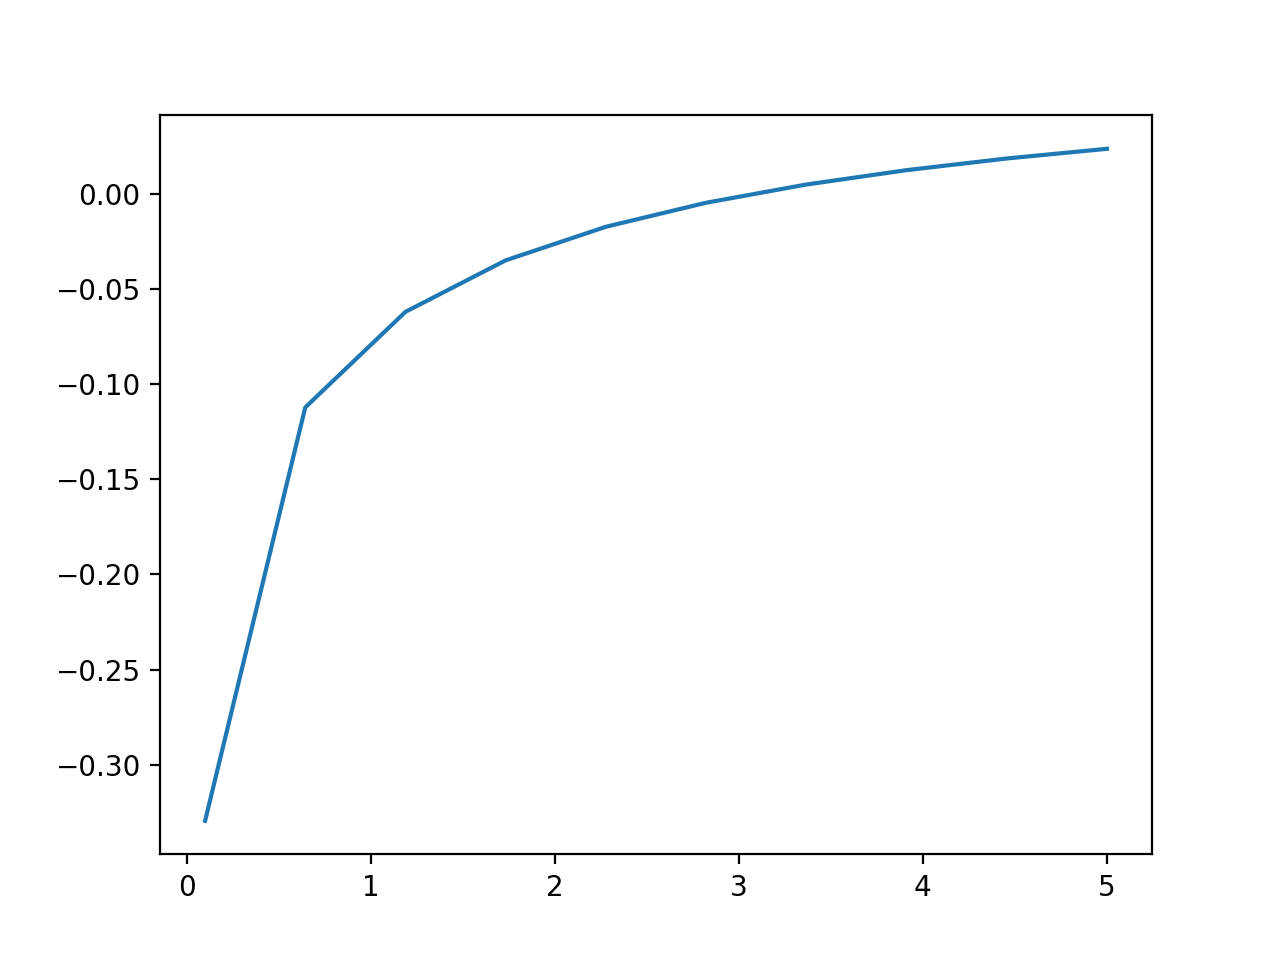

In [28]:
# Hyper Parameter tuning using GridSearch Cross Validation
lm_ridge = Ridge()
alphas = np.linspace(0.1, 5, 10)
print(alphas)
n_folds = 3

clf = GridSearchCV(lm_ridge, [{'alpha': alphas}], cv=n_folds)
clf.fit(X_train, Y_train)
scores = clf.cv_results_['mean_test_score']
plt.plot(alphas, scores)

In [20]:
def get_data():
    data_frame = pd.read_csv('ad_data/train.csv', nrows=2000)
    exclude_from_transformation = ['id', 'click', 'hour', 'device_ip', 'device_id']
    headers = data_frame.columns.tolist()
    for header in headers:
        if header in exclude_from_transformation:
            continue
        one_hot = pd.get_dummies(data_frame[header], prefix=header)
        data_frame = data_frame.drop(header, axis=1)
        data_frame = data_frame.join(one_hot)
    X = data_frame.drop(['click', 'id', 'hour', 'device_ip', 'device_id'], axis=1)
    Y = data_frame['click']
    print(X.shape)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/4., random_state=0)
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = get_data()

(2000, 1363)


In [21]:
model = joblib.load(open('models/ad_model.pkl', 'rb'))
ad_data, click_labels = X_test[:5], Y_test[:5]
bids = [10, 20, 5, 12, 2]
X_test.shape

(500, 1363)

In [22]:
def rank_ads(model, ads, bids):
    ctr_preds = model.predict(ads)
    rank_scores = np.array(ctr_preds*bids)
    idx = np.argsort(-rank_scores)
    return idx, ctr_preds, rank_scores

In [23]:
ad_rankings, ctr_preds, rank_scores = rank_ads(model, ad_data, bids)

In [24]:
ad_rankings

array([1, 0, 4, 3, 2])

In [25]:
rank_scores

array([ 0.99791756,  3.40183003, -1.93873757, -0.70746257,  0.47427375])

In [26]:
ctr_preds

array([ 0.09979176,  0.1700915 , -0.38774751, -0.05895521,  0.23713687])

In [27]:
ctr_preds[ad_rankings]

array([ 0.1700915 ,  0.09979176,  0.23713687, -0.05895521, -0.38774751])